In [1]:
import os
import numpy as np
import pandas as pd
from tqdm import tqdm

In [2]:
pip install scikit-learn-extra

     |████████████████████████████████| 1.7 MB 5.0 MB/s 


In [3]:
from sklearn import preprocessing
from sklearn.preprocessing import RobustScaler
from sklearn_extra.cluster import KMedoids
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (13, 8)
import seaborn as sns

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
original = pd.read_csv('/content/drive/MyDrive/EM:IP/정리/최종 데이터 파일/new_new_variables/3_Outliers_3_Full_C_without_ln_scoring_gender(0507).csv', sep=',')
original.head()

,Unnamed: 0,ID,Unnamed..0.1,Unnamed..0,cnt,time_a,time_b1,time_b2,time_b3,time_b4,...,time_explore_total,events_num,length,time_avg_explore,time_avg_btw_events,time_ticket_explore,ratio,mean,weight,gender
0,1,ARE000027907117,1,1,ARE,10.5,8.0,0.0,35.4,0.0,...,56.3,15,3,17.966667,4.286667,0.0,0.64,391.500000,7638.195150,2
1,2,ARE000011302798,2,2,ARE,145.8,7.2,0.0,0.0,0.0,...,210.8,30,3,51.000000,7.266667,0.0,0.37,212.100000,4349.167700,2
2,3,ARE000018804820,3,3,ARE,45.4,10.5,0.0,0.0,0.0,...,48.3,10,2,27.950000,5.880000,0.0,0.28,168.500000,3287.447976,1
3,4,ARE000039910042,4,4,ARE,10.9,4.3,0.0,9.9,16.3,...,66.0,43,5,8.280000,1.634884,1.4,0.37,227.000000,4428.787482,1
4,5,ARE000006001557,5,5,ARE,23.9,3.8,0.0,0.0,30.5,...,84.3,25,4,14.550000,3.524000,7.5,0.61,338.428571,7308.636611,2


In [6]:
original[original.isnull().any(axis=1)]

,Unnamed: 0,ID,Unnamed..0.1,Unnamed..0,cnt,time_a,time_b1,time_b2,time_b3,time_b4,...,time_explore_total,events_num,length,time_avg_explore,time_avg_btw_events,time_ticket_explore,ratio,mean,weight,gender


In [8]:
df = original[['time_start','time_b1','time_b3','time_irrelevant','time_avg_btw_events']]
df

,time_start,time_b1,time_b3,time_irrelevant,time_avg_btw_events
0,154.4,8.0,35.4,10.4,4.286667
1,28.4,7.2,0.0,65.0,7.266667
2,40.8,10.5,0.0,2.9,5.880000
3,20.8,4.3,9.9,28.9,1.634884
4,9.3,3.8,0.0,29.9,3.524000
...,...,...,...,...,...
7186,15.7,8.3,0.0,1.6,2.250000
7187,19.8,11.5,0.0,4.4,4.170000
7188,24.7,12.9,0.0,1.4,6.275000
7189,11.9,0.0,0.0,0.9,4.545455


In [9]:
df = df.dropna(axis=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7191 entries, 0 to 7190
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   time_start           7191 non-null   float64
 1   time_b1              7191 non-null   float64
 2   time_b3              7191 non-null   float64
 3   time_irrelevant      7191 non-null   float64
 4   time_avg_btw_events  7191 non-null   float64
dtypes: float64(5)
memory usage: 337.1 KB


In [10]:
df_2 = df[['time_start','time_b1','time_b3','time_irrelevant','time_avg_btw_events']]
df_2

,time_start,time_b1,time_b3,time_irrelevant,time_avg_btw_events
0,154.4,8.0,35.4,10.4,4.286667
1,28.4,7.2,0.0,65.0,7.266667
2,40.8,10.5,0.0,2.9,5.880000
3,20.8,4.3,9.9,28.9,1.634884
4,9.3,3.8,0.0,29.9,3.524000
...,...,...,...,...,...
7186,15.7,8.3,0.0,1.6,2.250000
7187,19.8,11.5,0.0,4.4,4.170000
7188,24.7,12.9,0.0,1.4,6.275000
7189,11.9,0.0,0.0,0.9,4.545455


In [11]:
x = df_2.to_numpy()
x = RobustScaler().fit_transform(x)
df_scale = pd.DataFrame(x, columns = df_2.columns, index = df_2.index)
df_scale

,time_start,time_b1,time_b3,time_irrelevant,time_avg_btw_events
0,13.192308,0.000000,2.681818,1.096774,0.698764
1,1.076923,-0.126984,0.000000,9.903226,2.317145
2,2.269231,0.396825,0.000000,-0.112903,1.564073
3,0.346154,-0.587302,0.750000,4.080645,-0.741369
4,-0.759615,-0.666667,0.000000,4.241935,0.284574
...,...,...,...,...,...
7186,-0.144231,0.047619,0.000000,-0.322581,-0.407311
7187,0.250000,0.555556,0.000000,0.129032,0.635405
7188,0.721154,0.777778,0.000000,-0.354839,1.778590
7189,-0.509615,-1.269841,0.000000,-0.435484,0.839307


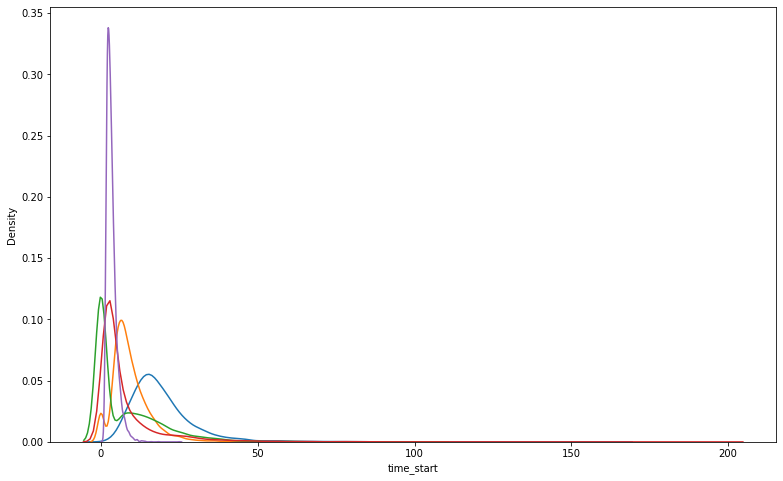

In [12]:
sns.kdeplot(df['time_start'])
sns.kdeplot(df['time_b1'])
sns.kdeplot(df['time_b3'])
sns.kdeplot(df['time_irrelevant'])
sns.kdeplot(df['time_avg_btw_events'])

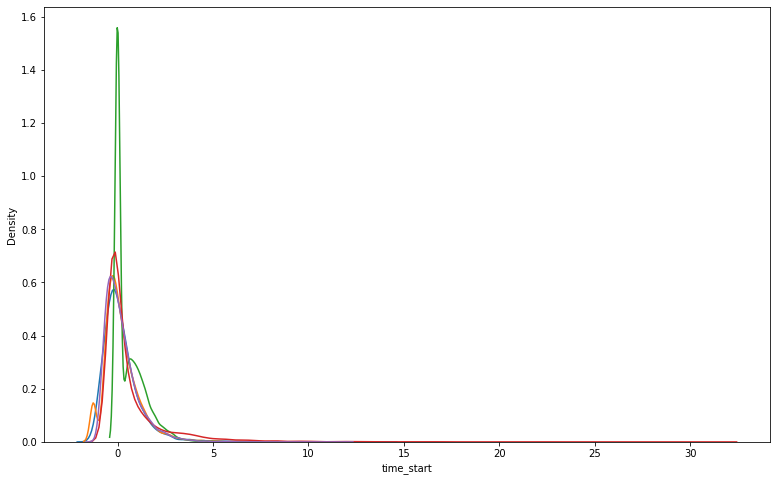

In [13]:
sns.kdeplot(df_scale['time_start'])
sns.kdeplot(df_scale['time_b1'])
sns.kdeplot(df_scale['time_b3'])
sns.kdeplot(df_scale['time_irrelevant'])
sns.kdeplot(df_scale['time_avg_btw_events'])

100%|██████████| 14/14 [00:28<00:00,  2.03s/it]


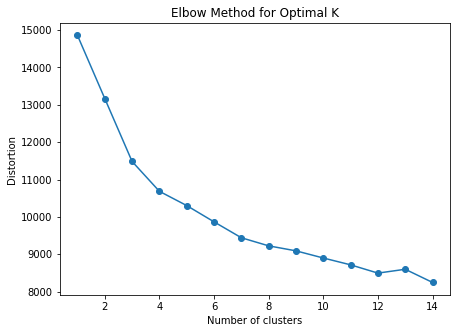

In [14]:
distortions = []
for i in tqdm(range(1, 15)):
    kmedoids = KMedoids(n_clusters=i, random_state=0).fit(x)
    #inertia가 군집 내의 분산을 의미
    distortions.append(kmedoids.inertia_)

# plot
plt.figure(figsize=(7,5))
plt.plot(range(1, 15), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.title('Elbow Method for Optimal K')
plt.show()

In [15]:
num = 4
kmedoids = KMedoids(n_clusters=num, random_state=0).fit(x)
print(kmedoids.labels_)

[2 0 3 ... 3 1 1]


In [16]:
df_scale['cluster'] = kmedoids.labels_
df_scale

,time_start,time_b1,time_b3,time_irrelevant,time_avg_btw_events,cluster
0,13.192308,0.000000,2.681818,1.096774,0.698764,2
1,1.076923,-0.126984,0.000000,9.903226,2.317145,0
2,2.269231,0.396825,0.000000,-0.112903,1.564073,3
3,0.346154,-0.587302,0.750000,4.080645,-0.741369,0
4,-0.759615,-0.666667,0.000000,4.241935,0.284574,0
...,...,...,...,...,...,...
7186,-0.144231,0.047619,0.000000,-0.322581,-0.407311,1
7187,0.250000,0.555556,0.000000,0.129032,0.635405,3
7188,0.721154,0.777778,0.000000,-0.354839,1.778590,3
7189,-0.509615,-1.269841,0.000000,-0.435484,0.839307,1


# 두 변수 상관이 너무 높음

In [17]:
original['cluster'] =  kmedoids.labels_

In [18]:
original.to_csv('5_Clustering_1_start,b1,b3,irre,avgevents_4C.csv')